In [53]:
import pandas as pd
df = pd.read_csv('Titanic-Dataset.csv')

In [54]:
# Display basic information
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## **1.What are the different types of missing data?**

In [55]:
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [56]:
# Display data types
print("\nData Types:")
print(df.dtypes)


Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


## 2. Handle missing values using mean/median/imputation

In [57]:
# Handle missing 'Age' with the median (less sensitive to outliers)
df = df.assign(Age=df['Age'].fillna(df['Age'].median()))


In [58]:
# Handle missing 'Embarked' with the mode (most frequent value)
df = df.assign(Embarked=df['Embarked'].fillna(df['Embarked'].mode()[0]))

In [60]:
# For 'Cabin', there are too many missing values, so we might drop the column
# or use a more sophisticated imputation strategy. For this example, let's drop it.
# df.drop('Cabin', axis=1, inplace=True)
df['Cabin'] = df['Cabin'].fillna('Unknown')
print("\nMissing Values after handling:")
print(df.isnull().sum())


Missing Values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [47]:
for col in ['Age', 'Fare']:
    if df[col].skew() > 0.5:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mean())

# Impute missing values for categorical features
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Verify that there are no more missing values
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## 3. Convert categorical features into numerical using encoding

In [61]:
import pandas as pd

# Identify categorical columns
categorical_cols = ['Sex', 'Embarked', 'Cabin', 'Pclass']

# Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Initialize LabelEncoder and OneHotEncoder
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)


# Encode 'Sex' using Label Encoding
df['Sex'] = label_encoder.fit_transform(df['Sex'])


# Encode 'Embarked' and 'Pclass' using OneHotEncoding
encoded_features = onehot_encoder.fit_transform(df[['Embarked', 'Pclass']])
encoded_df = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out(['Embarked', 'Pclass']))
df = pd.concat([df, encoded_df], axis=1)
df = df.drop(['Embarked', 'Pclass'], axis=1)


# Encode 'Cabin' using Label Encoding
df['Cabin'] = label_encoder.fit_transform(df['Cabin'])

# Verify the encoding
print(df.dtypes)
display(df.head())

PassengerId      int64
Survived         int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin            int64
Embarked_C     float64
Embarked_Q     float64
Embarked_S     float64
Pclass_1       float64
Pclass_2       float64
Pclass_3       float64
dtype: object


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,1.0,0.0,0.0,1.0,0.0,0.0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,0.0,0.0,1.0,0.0,0.0,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,0.0,0.0,1.0,1.0,0.0,0.0
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,0.0,0.0,1.0,0.0,0.0,1.0


## 4. Normalize/standardize the numerical features



In [62]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical features, excluding binary encoded features and PassengerId
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Verify the scaling
print(df[numerical_features].describe())

              Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000
mean     0.363679    0.065376    0.063599    0.062858
std      0.163605    0.137843    0.134343    0.096995
min      0.000000    0.000000    0.000000    0.000000
25%      0.271174    0.000000    0.000000    0.015440
50%      0.346569    0.000000    0.000000    0.028213
75%      0.434531    0.125000    0.000000    0.060508
max      1.000000    1.000000    1.000000    1.000000


## 5. Visualize outliers using boxplots

---



---



---



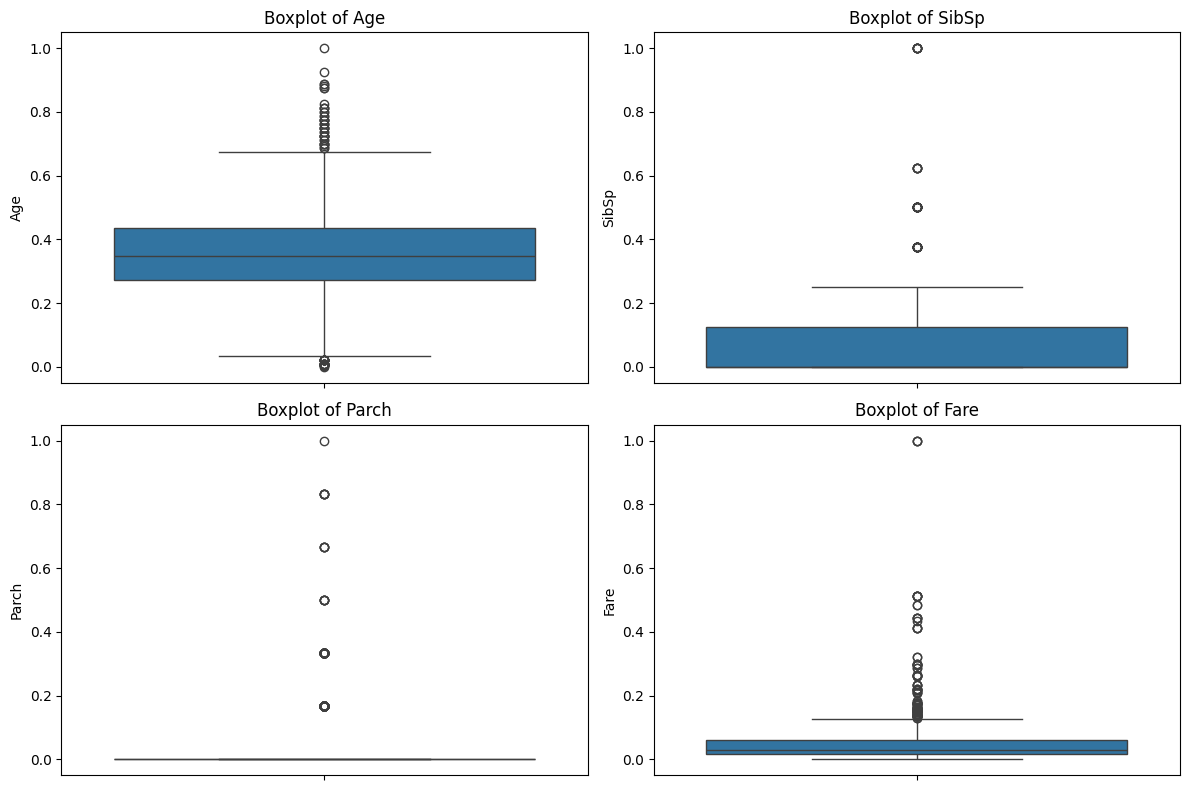

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features for boxplot visualization
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']

# Create subplots for each numerical feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.ravel()  # Flatten the axes array for easier iteration

# Create boxplots for each feature
for i, feature in enumerate(numerical_features):
    sns.boxplot(ax=axes[i], y=df[feature])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

# Remove outliers

In [64]:
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
df_no_outliers = df.copy()

for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[(df_no_outliers[feature] >= lower_bound) & (df_no_outliers[feature] <= upper_bound)]

print("Shape of the original dataframe:", df.shape)
print("Shape of the dataframe after outlier removal:", df_no_outliers.shape)

Shape of the original dataframe: (891, 16)
Shape of the dataframe after outlier removal: (577, 16)
